In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# **Data Understanding**

Deskripsi Dataset Kampanye Pemasaran Bank
Dataset ini berisi informasi tentang kampanye pemasaran langsung (melalui panggilan telepon) dari sebuah institusi perbankan. Tujuannya adalah untuk memprediksi apakah klien akan berlangganan deposito berjangka setelah kampanye pemasaran.

Dataset ini dibagi menjadi beberapa kelompok atribut untuk memudahkan pemahaman.

**1. Data Klien (Client Data)
Informasi dasar tentang klien.**

- age (usia):

    - Tipe Data: Numerik (angka)

    - Deskripsi: Usia klien dalam tahun.

- job (pekerjaan):

    - Tipe Data: Kategorikal

    - Kategori: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown"

    - Deskripsi: Jenis pekerjaan klien.

- marital (status perkawinan):

    - Tipe Data: Kategorikal

    - Kategori: "divorced", "married", "single", "unknown"

    - Catatan: "divorced" juga mencakup janda/duda (widowed).

- education (pendidikan):

    - Tipe Data: Kategorikal

    - Kategori: "basic.4y" (4 tahun dasar), "basic.6y" (6 tahun dasar), "basic.9y" (9 tahun dasar), "high.school" (SMA), "illiterate" (buta huruf), "professional.course" (kursus profesional), "university.degree" (gelar universitas), "unknown"

- default (kredit macet):

    - Tipe Data: Kategorikal

    - Kategori: "no", "yes", "unknown"

    - Deskripsi: Apakah klien memiliki kredit yang macet?

- housing (pinjaman perumahan):

    - Tipe Data: Kategorikal

    - Kategori: "no", "yes", "unknown"

    - Deskripsi: Apakah klien memiliki pinjaman perumahan?

- loan (pinjaman pribadi):

    - Tipe Data: Kategorikal

    - Kategori: "no", "yes", "unknown"

    - Deskripsi: Apakah klien memiliki pinjaman pribadi?

**2. Data Terkait Kontak Terakhir dari Kampanye Saat Ini
Informasi ini berkaitan dengan kontak terakhir yang dilakukan dalam kampanye pemasaran saat ini.**

- contact (tipe kontak):

    - Tipe Data: Kategorikal

    - Kategori: "cellular" (ponsel), "telephone" (telepon rumah)

    - Deskripsi: Jenis media komunikasi yang digunakan untuk kontak.

- month (bulan kontak):

    - Tipe Data: Kategorikal

    - Kategori: "jan", "feb", "mar", ..., "nov", "dec"

    - Deskripsi: Bulan kontak terakhir.

- day_of_week (hari kontak):

    - Tipe Data: Kategorikal

    - Kategori: "mon", "tue", "wed", "thu", "fri"

    - Deskripsi: Hari dalam seminggu kontak terakhir dilakukan.

- duration (durasi):

    - Tipe Data: Numerik (detik)

    - Deskripsi: Durasi kontak terakhir dalam detik.

    - Catatan Penting: Atribut ini sangat mempengaruhi variabel target (y). Jika duration=0, maka y pasti "no".

**3. Atribut Lain
Informasi lain yang relevan dengan kampanye.**

- campaign (kampanye):

    - Tipe Data: Numerik

    - Deskripsi: Jumlah kontak yang dilakukan selama kampanye ini untuk klien ini (termasuk kontak terakhir).

- pdays (hari sejak kontak sebelumnya):

    - Tipe Data: Numerik

    - Deskripsi: Jumlah hari yang berlalu sejak klien terakhir kali dihubungi dari kampanye sebelumnya.

    - Catatan: Nilai 999 berarti klien tidak pernah dihubungi sebelumnya.

- previous (kontak sebelumnya):

    - Tipe Data: Numerik

    - Deskripsi: Jumlah kontak yang dilakukan sebelum kampanye ini untuk klien ini.

- poutcome (hasil kampanye sebelumnya):

    - Tipe Data: Kategorikal

    - Kategori: "failure" (gagal), "nonexistent" (tidak ada), "success" (berhasil)

    - Deskripsi: Hasil dari kampanye pemasaran sebelumnya.

**4. Atribut Konteks Sosial dan Ekonomi
Variabel-variabel ini mencerminkan kondisi sosial dan ekonomi pada saat kontak.**

- emp.var.rate (tingkat variasi pekerjaan):

    - Tipe Data: Numerik

    - Deskripsi: Tingkat variasi pekerjaan, indikator kuartalan.

- cons.price.idx (indeks harga konsumen):

    - Tipe Data: Numerik

    - Deskripsi: Indeks harga konsumen, indikator bulanan.

- cons.conf.idx (indeks kepercayaan konsumen):

    - Tipe Data: Numerik

    - Deskripsi: Indeks kepercayaan konsumen, indikator bulanan.

- euribor3m (suku bunga euribor 3 bulan):

    - Tipe Data: Numerik

    - Deskripsi: Suku bunga euribor 3 bulan, indikator harian.

- nr.employed (jumlah karyawan):

    - Tipe Data: Numerik

    - Deskripsi: Jumlah karyawan, indikator kuartalan.

**5. Variabel Target (Output Variable)
Ini adalah variabel yang ingin Anda prediksi.**

- y (berlangganan deposit):

    - Tipe Data: Biner (dua kategori)

    - Kategori: "yes" (ya), "no" (tidak)

    - Deskripsi: Apakah klien berlangganan deposito berjangka?.

Menggunakan `df.describe()` untuk memberikan ringkasan statistik dasar dari data yang ada di dalam DataFrame.

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Melihat ringkasan eksploratif awal dari setiap kolom dalam DataFrame df

In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[37, 36]"
1,job,object,0,0.0,12,"[admin., services]"
2,marital,object,0,0.0,4,"[single, divorced]"
3,education,object,0,0.0,8,"[basic.6y, illiterate]"
4,default,object,0,0.0,3,"[yes, unknown]"
5,housing,object,0,0.0,3,"[unknown, no]"
6,loan,object,0,0.0,3,"[no, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[apr, oct]"
9,day_of_week,object,0,0.0,5,"[tue, wed]"


Menggunakan `df.isna().sum()`, untuk melihat data nan pada df

In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Terlihat bahwa di dalam Dataset tidak ada Missing value

Melihat unique value di dalam Dataset

In [15]:
pd.set_option('display.max_colwidth',None)

pd.DataFrame({
    'Feature':df.columns.values,
    'Number of Unique':df.nunique().values,
    'Unique Values':[df[i].unique() for i in df.columns]
})

,Feature,Number of Unique,Unique Values
0,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,4,"[married, single, divorced, unknown]"
3,education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,3,"[no, unknown, yes]"
5,housing,3,"[no, yes, unknown]"
6,loan,3,"[no, yes, unknown]"
7,contact,2,"[telephone, cellular]"
8,month,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,5,"[mon, tue, wed, thu, fri]"


Terlihat bahwa banyak kolom yang berisikan `Unknown`, dengan hal ini menunjukan bahwa `Unknown` merupakan missing value

mengecek Value count pada kolom 'y' yang nantinya akan dipakai untuk target dalam model Machine Learning

In [16]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

Terlihat bahwa data dari kolom target 'y' imbalance

# **Data Distribution**

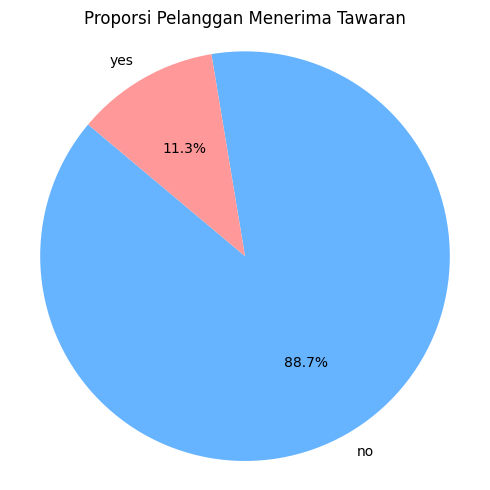

In [17]:
class_counts = df['y'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Proporsi Pelanggan Menerima Tawaran')
plt.axis('equal') 
plt.tight_layout()
plt.show()

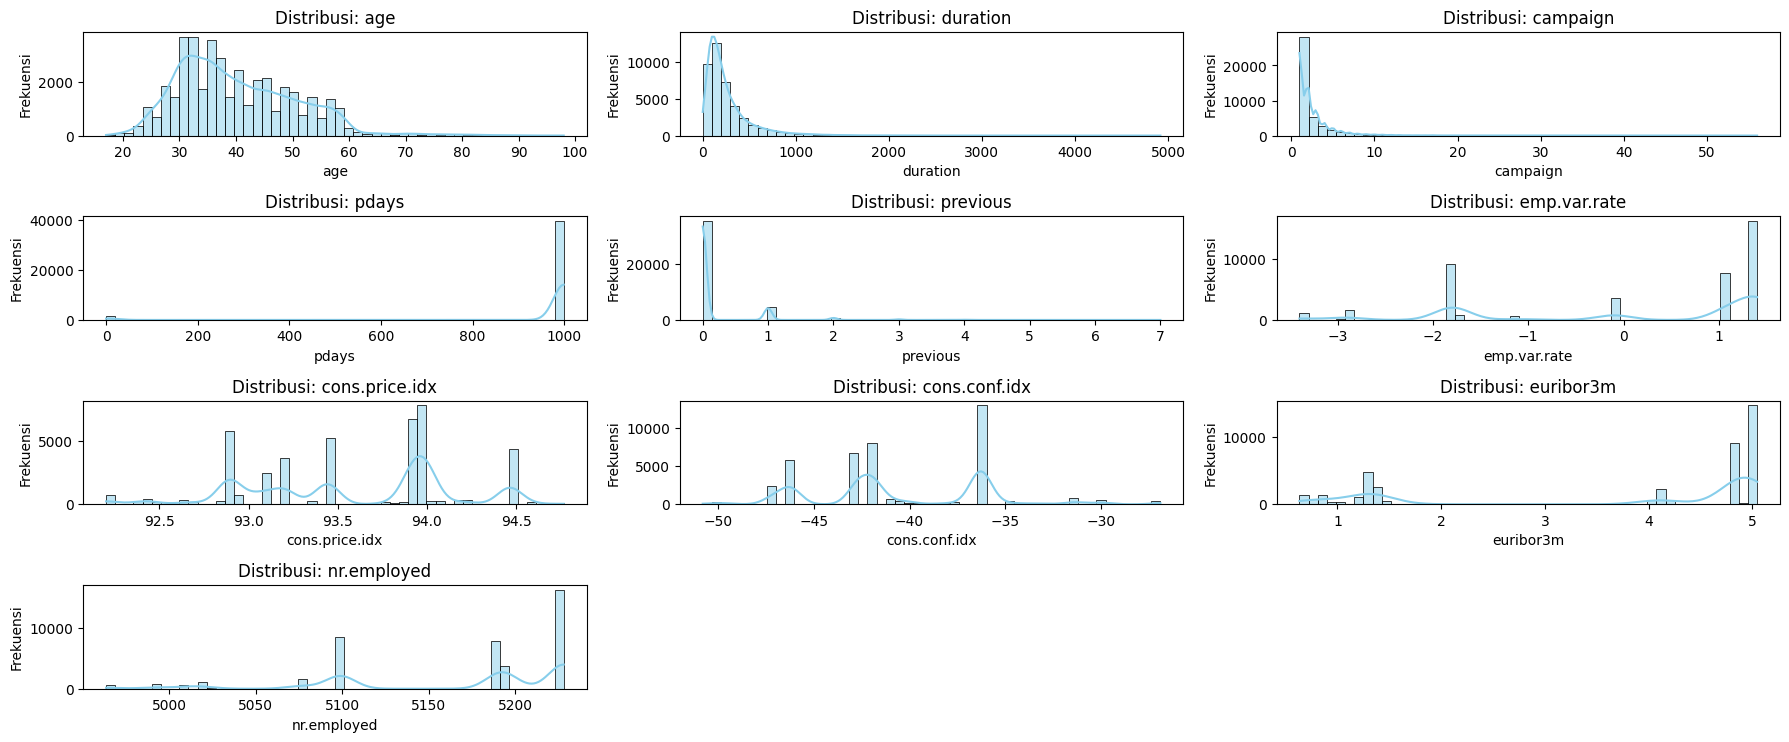

In [18]:
numerikal_col=df.describe().columns

plt.figure(figsize=(18, 20))
for i, data in enumerate(numerikal_col):
    plt.subplot(11, 3, i+1)
    sns.histplot(df[data], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribusi: {data}')
    plt.xlabel(data)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

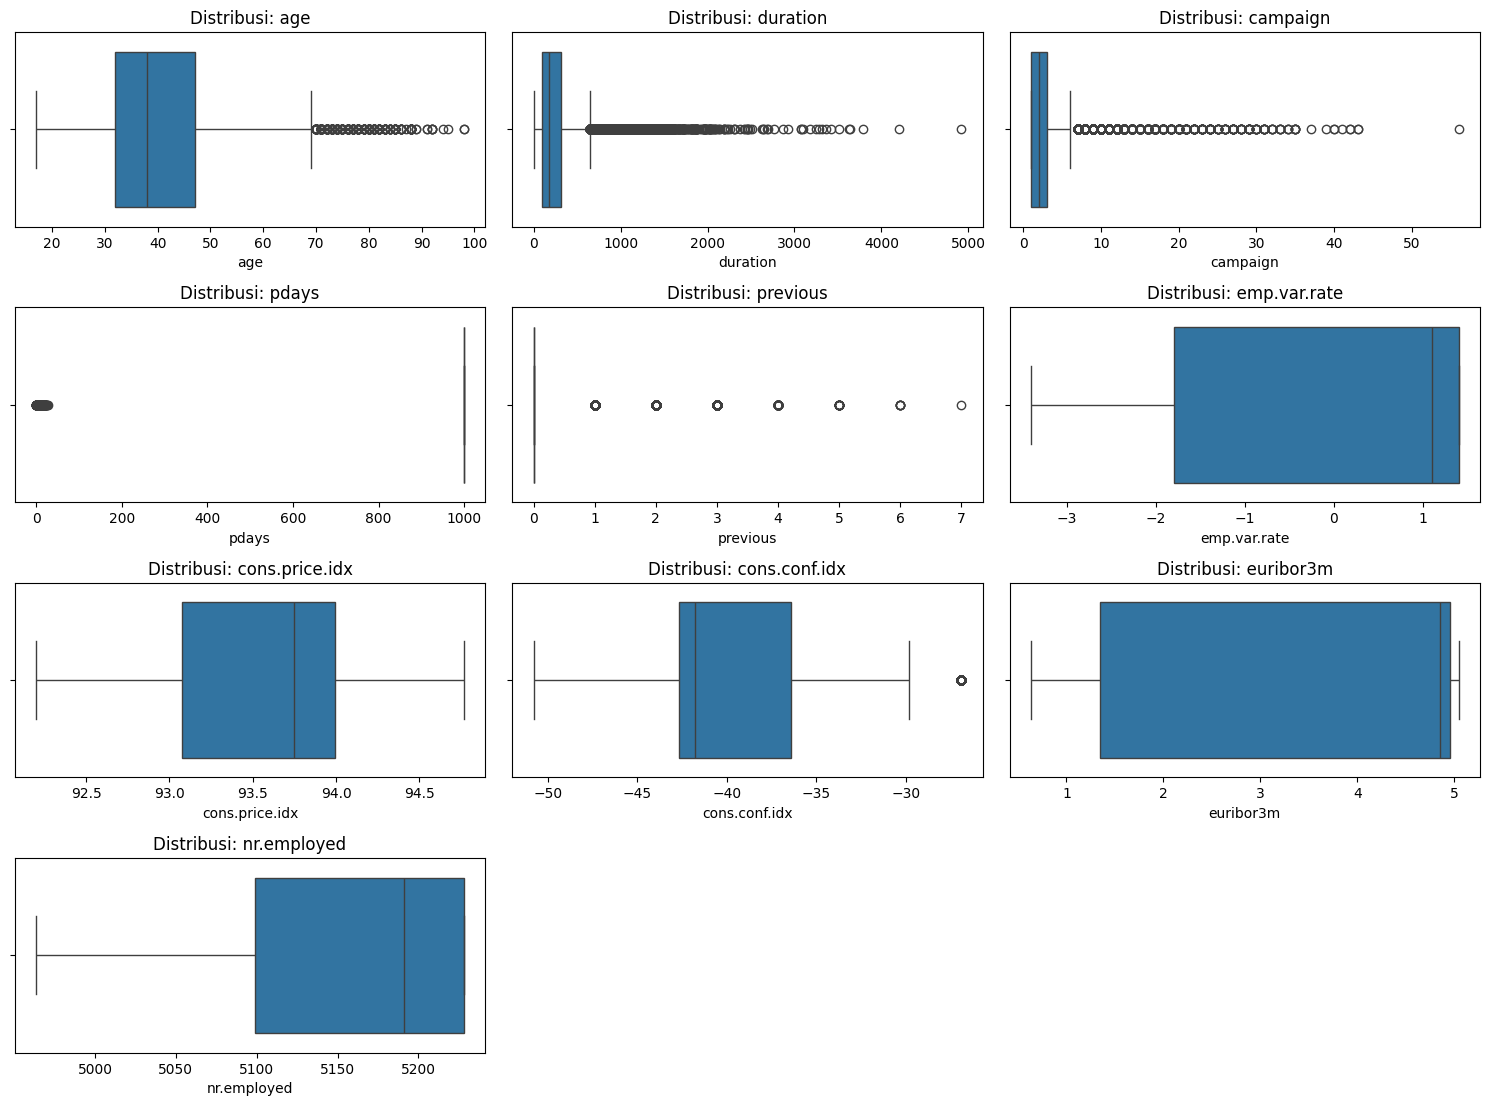

In [19]:
numerikal_col=df.describe().columns

plt.figure(figsize=(15, 30))
for i, data in enumerate(numerikal_col):
    plt.subplot(11, 3, i+1)
    sns.boxplot(x=df[data])
    plt.title(f'Distribusi: {data}')
    plt.xlabel(data)


plt.tight_layout()
plt.show()

# **Cleaning**

Menghitung Jumlah Kolom Unknown

In [ ]:
unknown_count = df.apply(lambda col: (col == 'unknown').sum())
unknown_count[unknown_count > 0]

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64

Mengubah kolom Unknown menjadi NaN

In [ ]:
df.replace('unknown', pd.NA, inplace=True)

Mengubah value(999) dikolom 'pdays', karena mengindikasikan pelanggan tidak bisa dihubungi/missing value

In [ ]:
df['pdays'] = df['pdays'].replace(999, pd.NA)

Menggunakan `df.isna().sum()`, kembali untuk melihat missing value yang sudah ditemukan

In [23]:
df.isna().sum()

age                   0
job                 330
marital              80
education          1731
default            8597
housing             990
loan                990
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             39673
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64

Menghapus kolom `pdays` karena memiliki missing value terlalu banyak

In [ ]:
df.drop(columns=['pdays'], inplace=True)

Menghapus missing value

In [ ]:
df.dropna(inplace=True)

Melihat total data yang sudah dibersihkan

In [26]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Setelah melakukan cleaning baris data yang tersisa 30488 data, dari data realnya 41188

Menyimpan dataset yang sudah dibersihkan atau `Cleaning`

In [193]:
df.to_csv("bank-additional-full_cleaned.csv", index=False)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  campaign        30488 non-null  int64  
 11  previous        30488 non-null  int64  
 12  poutcome        30488 non-null  object 
 13  emp.var.rate    30488 non-null  float64
 14  cons.price.idx  30488 non-null  float64
 15  cons.conf.idx   30488 non-null  float64
 16  euribor3m       30488 non-null  float64
 17  nr.employed     30488 non-null  floa

# **EDA**

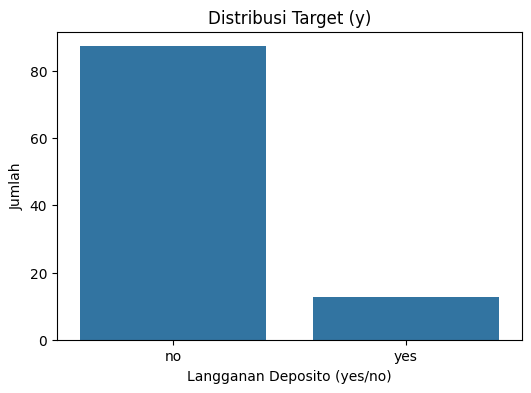

y
no     0.873426
yes    0.126574
Name: proportion, dtype: float64

In [107]:
#Distribusi Target y
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, stat="percent")
plt.title('Distribusi Target (y)')
plt.xlabel('Langganan Deposito (yes/no)')
plt.ylabel('Jumlah')
plt.show()

df['y'].value_counts(normalize=True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_15584\3123582906.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Berlangganan')


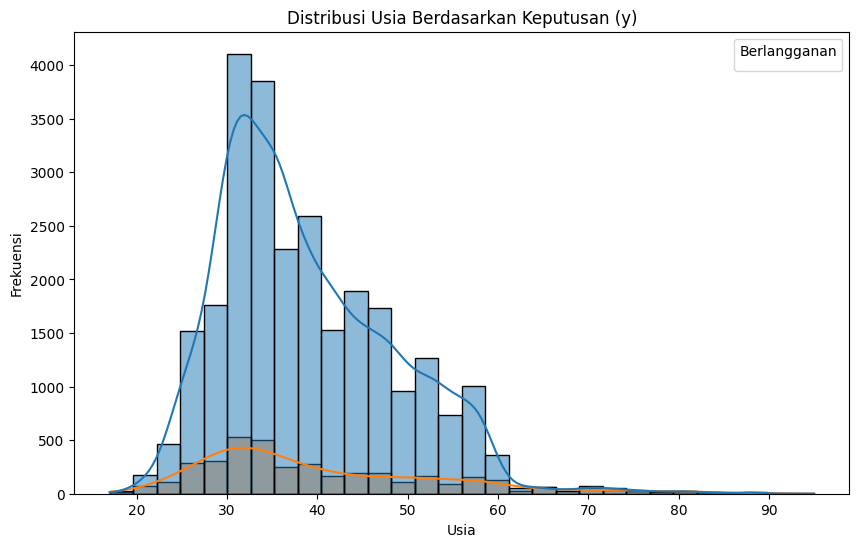

In [108]:
#Distribusi Usia vs Target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', bins=30, kde=True)
plt.title('Distribusi Usia Berdasarkan Keputusan (y)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.legend(title='Berlangganan')
plt.show()

Analysis
- Sebaran Umum Usia:
  - Usia terbanyak berkisar antara 30 hingga 40 tahun, dengan puncaknya sekitar usia 30–35 tahun.
  - Usia termuda sekitar 18 tahun, dan tertua lebih dari 90 tahun, tetapi jumlahnya sangat sedikit.
- Distribusi “Yes” (Berlangganan):
  - Meskipun keseluruhan populasi nasabah didominasi usia 30-an, proporsi berlangganan lebih banyak muncul pada usia 30–35 tahun, dan mulai menurun tajam setelah usia 60 tahun.
  - Nasabah muda (usia di bawah 25 tahun) dan lansia (di atas 65 tahun) hampir tidak berlangganan.

Acctionable Step
- Tim pemasaran bank dapat menyesuaikan kampanye promosi pada segmen usia tertentu:
    - Gunakan pendekatan digital dan fleksibel untuk usia 30–35 tahun.
    - Gunakan pendekatan yang menekankan stabilitas dan jaminan finansial untuk usia 50–60 tahun.
- Hasil distribusi ini juga menunjukkan bahwa rentang usia di atas 70 tahun sangat kecil kemungkinannya untuk berlangganan, sehingga biaya pemasaran pada kelompok ini bisa diminimalkan.

Referensi
- Kotler, P., & Keller, K. L. (2016). Marketing Management (15th Edition). Pearson Education.
- Wedel, M., & Kamakura, W. A. (2012). Market Segmentation: Conceptual and Methodological Foundations. Springer Science & Business Media.
- Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31.

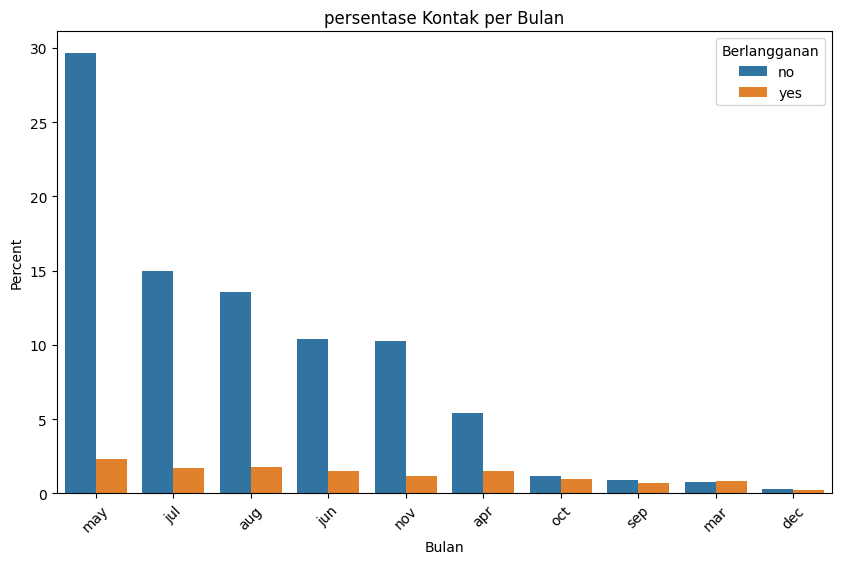

In [109]:
#Pengaruh Bulan Terhadap Hasil
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='y', data=df, order=df['month'].value_counts().index, stat="percent")
plt.title('persentase Kontak per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Percent')
plt.xticks(rotation=45)
plt.legend(title='Berlangganan')
plt.show()

analysis
- Bulan Mei (May) memiliki jumlah kontak tertinggi (>9000), tetapi tingkat keberhasilan (jumlah "yes") tetap rendah dibandingkan "no".
- Bulan dengan aktivitas kontak tinggi lainnya: Juli, Agustus, Juni, dan November.
- Bulan-bulan dengan jumlah kontak rendah: September, Oktober, Maret, Desember.
- Meskipun volume kontak menurun drastis setelah bulan Mei, rasio keberhasilan tidak menunjukkan peningkatan signifikan.

Acctionable Steps
- Optimalkan Bulan-Bulan Sepi
  - Bulan seperti Oktober–Desember memiliki sedikit kontak tetapi tidak berarti tidak efektif.
  - Coba strategi test & learn di bulan-bulan ini untuk menerapkan pendekatan baru, seperti:
    - Email marketing bertarget.
    - Kampanye loyalitas khusus usia produktif.



Referensi
- Kotler, P., & Keller, K. L. (2016). Marketing Management (15th ed.). Pearson.
- Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Decision Support Systems, 62, 22–31.

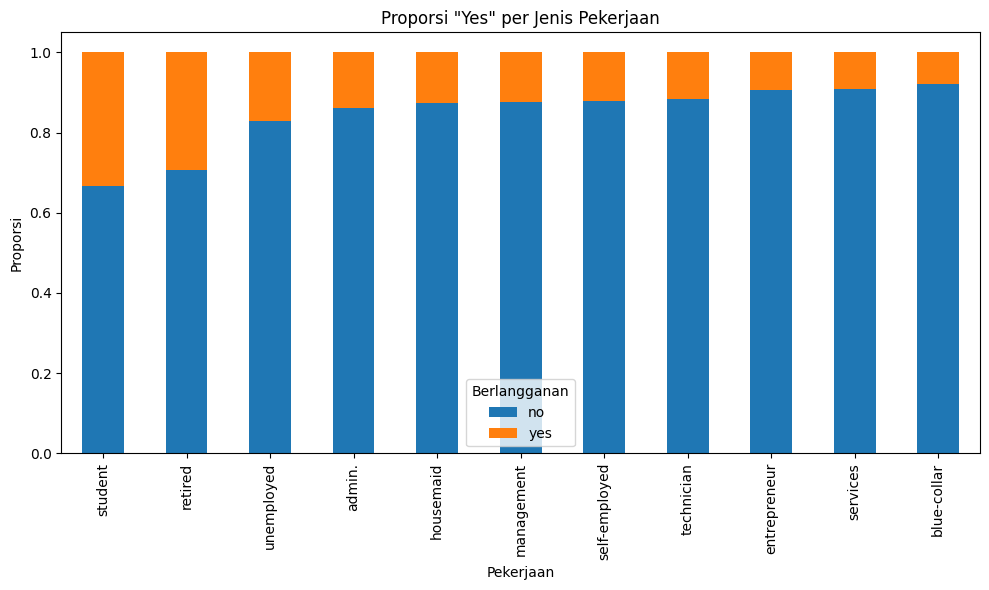

In [110]:
#Pengaruh Pekerjaan Terhadap Hasil
job_y = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
job_y.sort_values(by='yes', ascending=False).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Proporsi "Yes" per Jenis Pekerjaan')
plt.ylabel('Proporsi')
plt.xlabel('Pekerjaan')
plt.legend(title='Berlangganan')
plt.tight_layout()
plt.show()

Analysis
- Pekerjaan dengan proporsi tertinggi “yes”:
  - Student dan Retired (pensiunan) memiliki rasio keberhasilan tertinggi dibandingkan kategori lainnya.
- Pekerjaan dengan proporsi rendah:
  - Blue-collar, services, dan entrepreneur memiliki proporsi “yes” yang kecil.
- Terdapat penurunan proporsi “yes” secara konsisten dari kiri ke kanan pada grafik, mengindikasikan tren tertentu berdasarkan jenis pekerjaan.

Acctionable Steps
- Segmentasi Berdasarkan Pekerjaan
  - Prioritaskan kampanye kepada segmen pekerjaan yang menunjukkan rasio keberhasilan tinggi: student, retired, unemployed.
  - Gunakan pendekatan diferensiasi untuk segmen kurang responsif seperti blue-collar atau entrepreneur.
- Personalisasi Penawaran
  - Untuk mahasiswa: tawarkan produk tabungan mahasiswa, kartu debit/kredit pelajar, atau edukasi keuangan digital.
  - Untuk pensiunan: berikan program loyalitas, asuransi jiwa, dan deposito dengan bunga khusus.

Referensi
- Moro, S., Laureano, R., & Cortez, P. (2011).Using data mining for bank direct marketing: An application of the CRISP-DM methodology.
Expert Systems with Applications, 39(11), 9290–9296.
- Kotler, P., & Keller, K. L. (2016).Marketing Management (15th ed.). Pearson.
- Chaffey, D., & Ellis-Chadwick, F. (2019). Digital Marketing. Pearson.


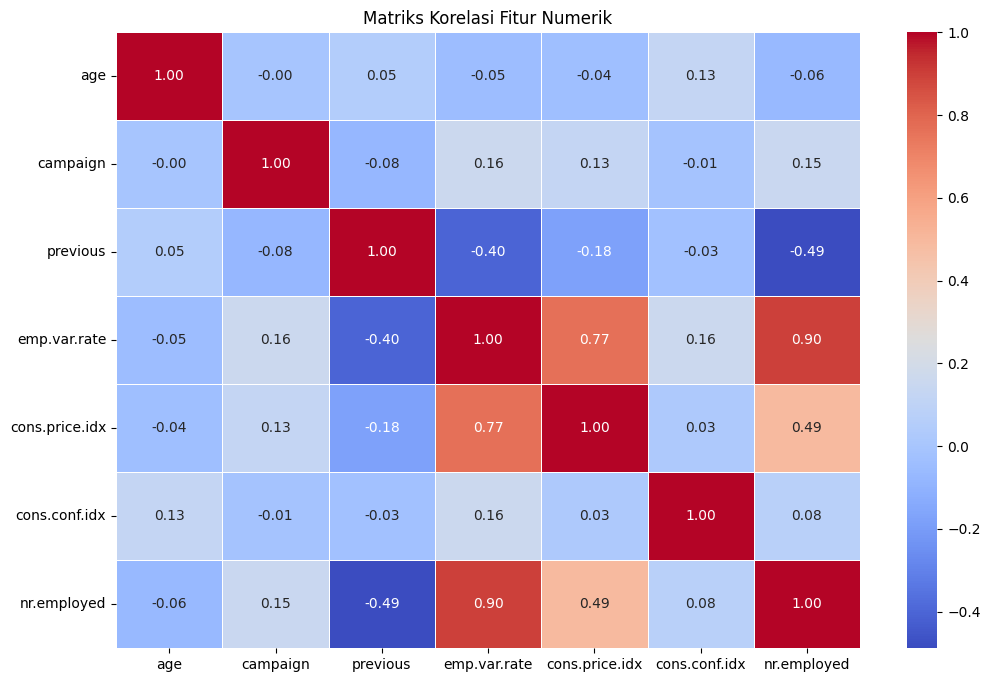

In [111]:
#Korelasi Antar Fitur Numerik
numeric_cols = ['age', 'campaign', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'nr.employed']

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Analysis
- Korelasi Tinggi Positif
  - emp.var.rate - nr.employed: 0.90
  - emp.var.rate - cons.price.idx: 0.77
  - Ini menandakan bahwa tingkat kerja (employment rate) sangat berkaitan dengan jumlah orang bekerja dan indeks harga konsumen.
  - Semakin tinggi tingkat pekerjaan, semakin tinggi pula jumlah orang yang dipekerjakan dan harga barang konsumen (inflasi ringan).
- Korelasi Negatif Signifikan
  - previous - nr.employed: –0.49
  - previous - emp.var.rate: –0.40
  - Artinya: semakin banyak kontak sebelumnya (previous), semakin rendah tingkat pekerjaan dan variabel ekonomi.
  - Kemungkinan besar ini menunjukkan upaya pemasaran dilakukan lebih agresif saat ekonomi sedang menurun.
- Korelasi Lemah
  - Sebagian besar variabel lainnya seperti age, campaign, cons.conf.idx memiliki korelasi yang lemah dengan variabel lain.
  - Variabel-variabel ini bisa tetap relevan secara non-linier atau dalam interaksi dengan variabel kategorikal.aign, dan pdays memiliki korelasi sangat lemah terhadap fitur-fitur lainnya. Artinya, faktor-faktor ini cenderung independen secara linier dari fitur numerik lain.

Acctionable Steps
- Waspadai Over-contacting (previous)
  - Korelasi negatif menunjukkan bahwa terlalu sering menghubungi prospek di masa lalu bisa berdampak buruk.
  - Tetapkan batasan jumlah kontak ulang dalam satu periode. Buat segmentasi berdasarkan respons sebelumnya.
- Pantau Indeks Harga Konsumen (cons.price.idx)
  - Jika harga konsumen meningkat, kemungkinan besar pelanggan menjadi lebih selektif dalam membelanjakan uang. modifikasi strategi penawaran (diskon, atau penawaran khusus).
- Hindari Generalisasi dari Korelasi Lemah
  - Fitur seperti age, campaign, dan cons.conf.idx tetap bisa penting melalui:
  - Interaksi dengan fitur lain (misalnya: usia dan jenis pekerjaan),
  - Model non-linier seperti decision tree atau ensemble models.

Referensi
- Kotler, P., & Keller, K. L. (2016). Marketing Management (15th ed.). Pearson.
- Moro, S., Cortez, P., & Rita, P. (2014).A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, 62, 22–31.